In [1]:
#--------RGB histogram match---------------------#

import PIL
from PIL import Image
import imagehash
import os
import cv2
import time
from pprint import pprint
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import random

In [2]:
# reading query image
# q_path = random.sample(trainhistpath, 1)[0]
q_path = './imagesbooks/ukbench06049.jpg'
print (q_path)
q_paths = list(paths.list_images('./imagesbooks'))

./imagesbooks/ukbench06049.jpg


In [3]:
# visualizing the histogram
def showHistograms (q_paths): # list of paths 
    for q_path in q_paths:
        img = cv2.imread(q_path)
        color = ('b','g','r')
        plt.figure(figsize=(4,4))
        for i,col in enumerate(color):
            histr = cv2.calcHist([img],[i],None,[256],[0,256])
            histr = cv2.normalize(histr, None)
            plt.plot(histr,color = col, linewidth=2.0)
            plt.xlim([0,256])
        plt.title(q_path)
        plt.show()

def showHistogramTable (q_paths, texts=['']*len(q_paths), sfactor=5):
    # sfactor = 5
    columns = 5
    rows = len(q_paths)//columns + ( 1 if (len(q_paths)%columns > 0 ) else 0 )
    l = 0
    fig=plt.figure(figsize=(sfactor*columns, sfactor*rows))
    ax = []
    for i in range(1, columns*rows +1):
        if l<len(q_paths) :             
#             plt.figure(figsize=(4,4))
            ax.append(fig.add_subplot(rows, columns, i))

            img = cv2.imread(q_paths[l])
            color = ('b','g','r')
            
            for i,col in enumerate(color):
                histr = cv2.calcHist([img],[i],None,[256],[0,256])
                histr = cv2.normalize(histr, None)
                plt.title(texts[l])
                # plt.plot(histr,color = col)
                ax[-1].plot(histr,color = col, linewidth=2.0)
                # ax[-1].xlim([0,256])    
            # ax[-1].set_title('score= %2.2f'%texts[l])            
            # ax[-1].set_title(texts[l])
            # plt.imshow(img)
            l+= 1

def showImages (q_paths): # list of paths 
    for item in q_paths : 
        plt.figure(figsize = (4,4))
        img = plt.imread (item)
        plt.imshow (img)
        plt.show()
        
def showImagesTable (q_paths, texts=['']*len(q_paths), sfactor = 3): 
    # sfactor = 3
    columns = 5
    rows = len(q_paths)//columns + ( 1 if (len(q_paths)%columns > 0 ) else 0 )
    l = 0
    fig=plt.figure(figsize=(sfactor*columns, sfactor*rows))
    ax = []
 
    # start plotting 
    for i in range(1, columns*rows +1):
        if l<len(q_paths) : 
            img = plt.imread(q_paths[l])
            ax.append(fig.add_subplot(rows, columns, i))
#             ax[-1].set_title('score= %2.2f'%texts[l])            
            ax[-1].set_title(texts[l])
            plt.imshow(img)
        l +=1
    plt.show()

# -----------------------
# notes 
# columns = len(d)
# rows = 1
# define fig as function of row, col
# fig=plt.figure(figsize=(rows*1, columns*1))
# fig=plt.figure(figsize=(10,10))
# fig=plt.figure(figsize=(20*columns, 20))

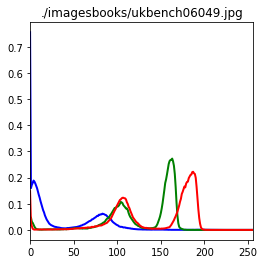

In [4]:
showHistograms ([q_path])

In [5]:
q_paths = ['./imagesbooks/ukbench06049.jpg', './imagesbooks/ukbench06050.jpg', './imagesbooks/ukbench06051.jpg', './imagesbooks/ukbench06048.jpg', './imagesbooks/ukbench05598.jpg', './imagesbooks/ukbench05964.jpg', './imagesbooks/ukbench05599.jpg', './imagesbooks/ukbench05603.jpg', './imagesbooks/ukbench05600.jpg', './imagesbooks/ukbench05965.jpg', './imagesbooks/ukbench05966.jpg', './imagesbooks/ukbench05602.jpg', './imagesbooks/ukbench05967.jpg']

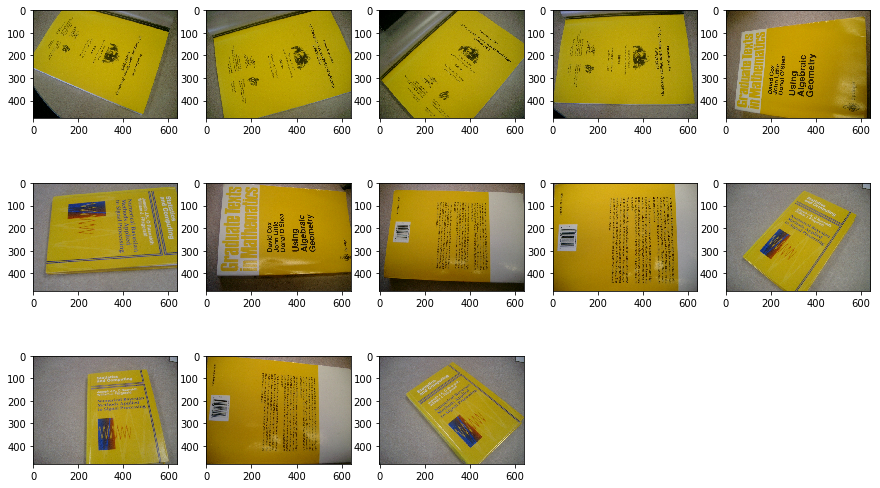

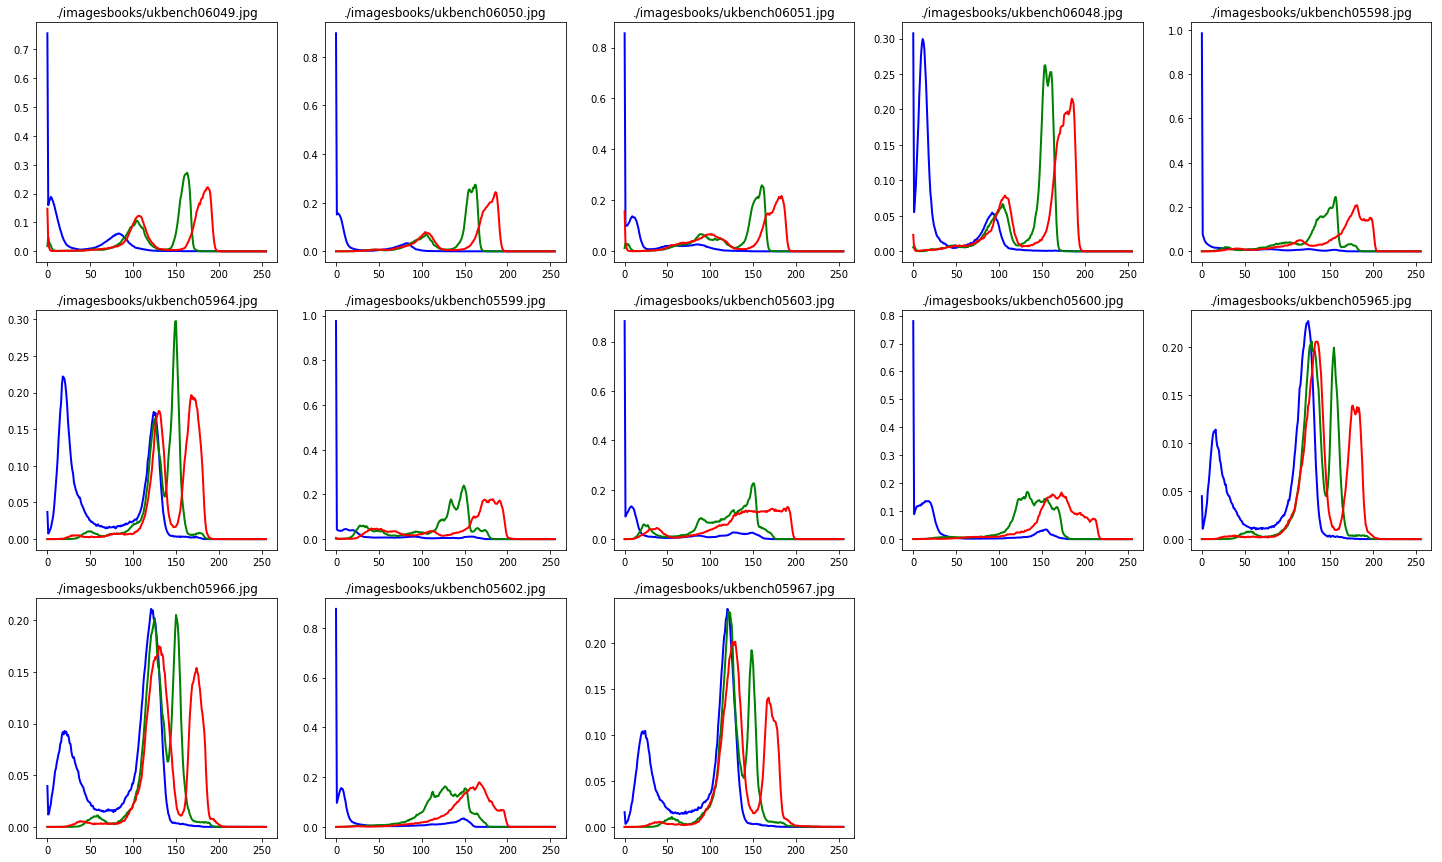

In [6]:
# q_paths = sorted(list(paths.list_images('./imagesbooks')))
q_list = q_paths
# showImages(q_list)
# showImagesTable (q_list)
showImagesTable (q_list)
showHistogramTable(q_list, q_list)

## Hist Eqalization 

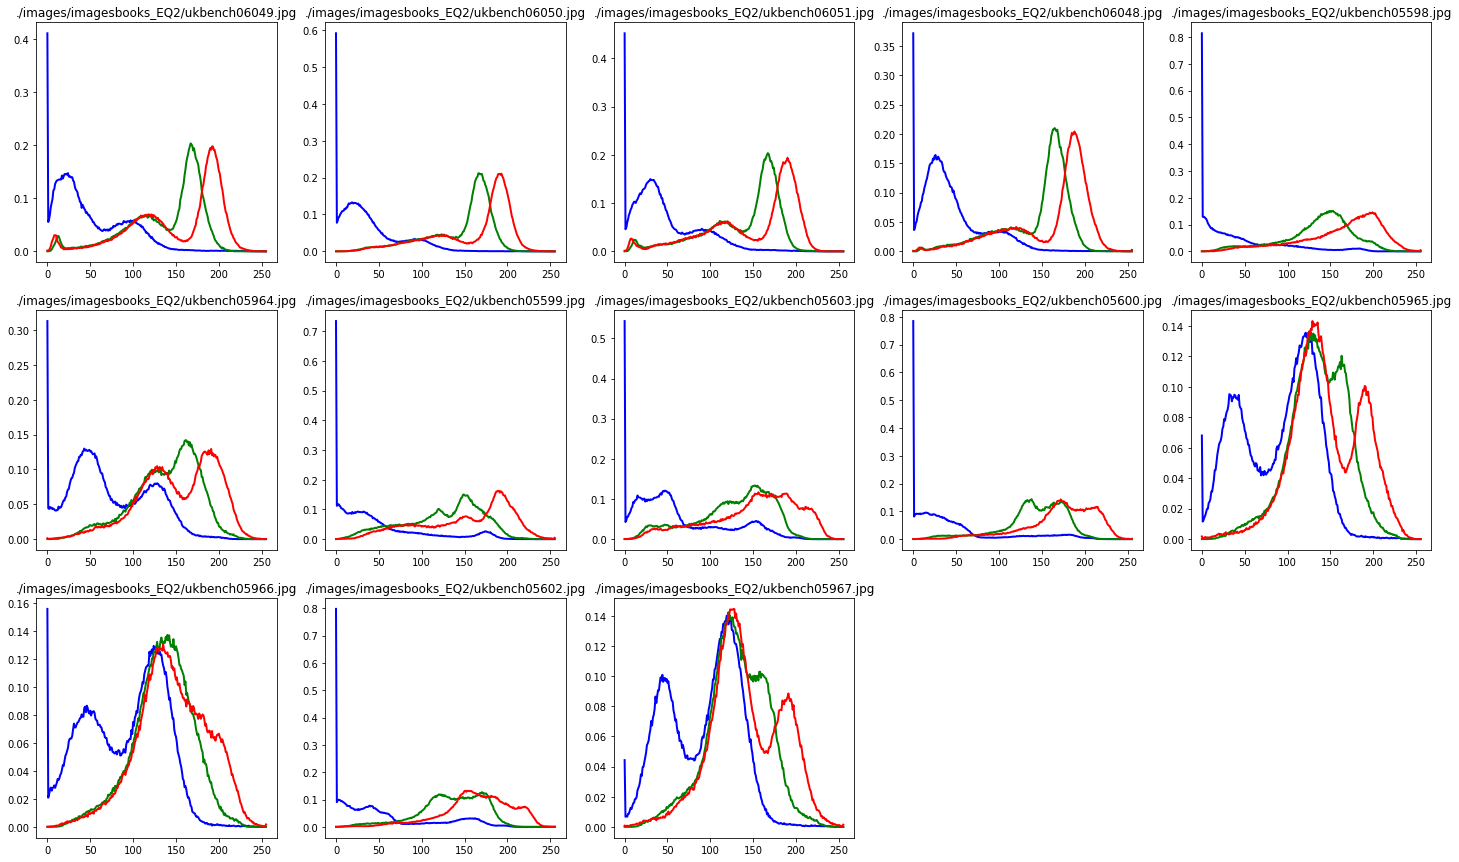

In [7]:
# q_paths = sorted(list(paths.list_images('./images/imagesbooks_EQ2/')))
q_list = q_paths
# showImages(q_list)
# showImagesTable (q_list)

# show equalized historgams for the same images 
dq_list = [w.replace('imagesbooks', 'images/imagesbooks_EQ2') for w in q_list]
showHistogramTable(dq_list, dq_list)

## Contrast 2.0 

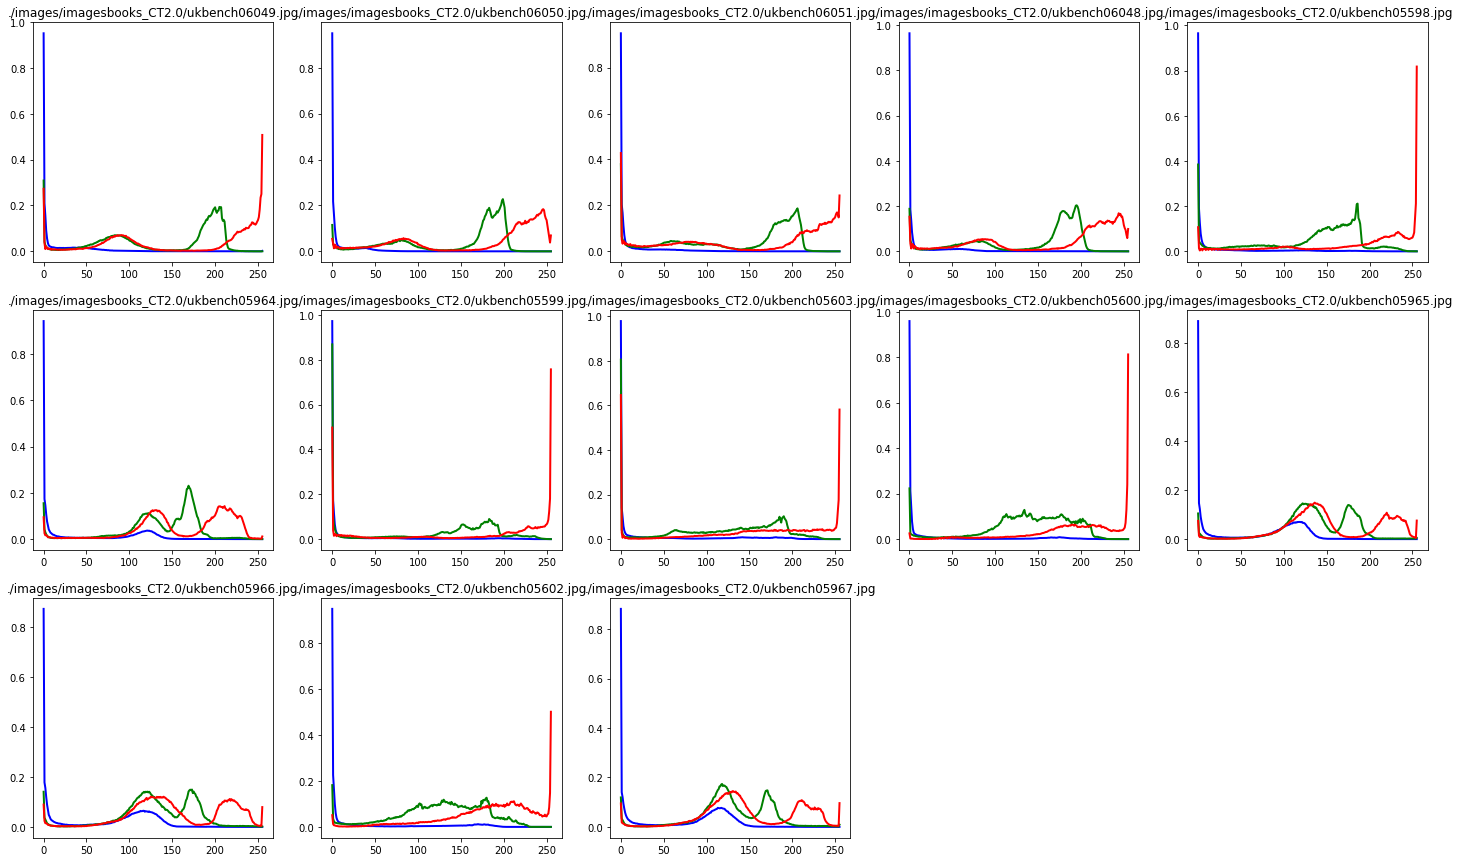

In [8]:
# show equalized historgams for the same images 
dq_list = [w.replace('imagesbooks', 'images/imagesbooks_CT2.0') for w in q_list]
showHistogramTable(dq_list, dq_list)

# Some Testing -- DONOT USE

In [29]:
# visualizing the histogram
def showHistogramsSNS (q_paths): # list of paths 
    for q_path in q_paths:
        img = cv2.imread(q_path)
        color = ('b','g','r')
        plt.figure(figsize=(4,4))
        for i,col in enumerate(color):
            histr = cv2.calcHist([img],[i],None,[256],[0,256])
            histr = cv2.normalize(histr, None)
            x = histr.reshape(256)
            sns.kdeplot(x, shade=True, color=col)
            
        plt.title(q_path)
        plt.show()

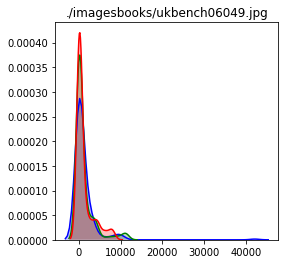

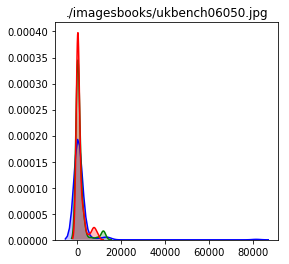

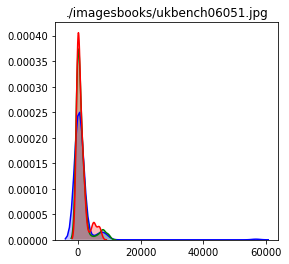

In [30]:
showHistogramsSNS(q_paths[:3])

In [23]:
img = cv2.imread(q_path)
color = ('b','g','r')
plt.figure(figsize=(4,4))
# for i,col in enumerate(color):
histr = cv2.calcHist([img],[0],None,[256],[0,256])
histr = cv2.normalize(histr, None)
# plt.plot(histr,color = col, linewidth=2.0)
# plt.xlim([0,256])

<Figure size 288x288 with 0 Axes>

In [24]:
x = histr.reshape(256)

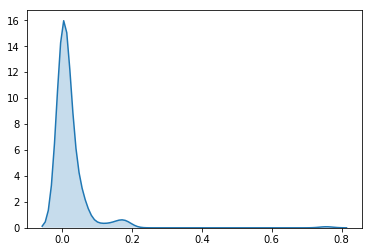

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.kdeplot(x, shade=True)

In [31]:
x

array([7.56106138e-01, 1.59975916e-01, 1.72454387e-01, 1.79474652e-01,
       1.88775167e-01, 1.84609681e-01, 1.77625328e-01, 1.68594137e-01,
       1.59688637e-01, 1.46527886e-01, 1.34103268e-01, 1.23115018e-01,
       1.09702900e-01, 9.84094217e-02, 8.59488994e-02, 7.51581565e-02,
       6.72401562e-02, 5.57850897e-02, 4.82082292e-02, 4.00029570e-02,
       3.47781517e-02, 2.96072140e-02, 2.39874087e-02, 2.11505760e-02,
       1.86189692e-02, 1.69132780e-02, 1.54230427e-02, 1.37353055e-02,
       1.21912062e-02, 1.18141584e-02, 1.10241538e-02, 1.01084663e-02,
       9.12096072e-03, 9.28255264e-03, 7.91799929e-03, 7.77436234e-03,
       6.73299283e-03, 6.44571846e-03, 6.03276165e-03, 5.76344179e-03,
       5.97889768e-03, 5.97889768e-03, 6.60731038e-03, 7.25367758e-03,
       7.12799514e-03, 7.57686142e-03, 8.07959121e-03, 8.61823093e-03,
       8.70800391e-03, 9.24664363e-03, 9.74937342e-03, 1.03957411e-02,
       1.10421088e-02, 1.08984709e-02, 1.15089295e-02, 1.27657549e-02,
      